In [1]:
# %pip install -U qiskit
from qiskit import __version__
print('Qiskit Sürümü: ', __version__)

Qiskit Sürümü:  1.0.2


## <b>Qiskit ile Simon Algoritması</b>

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit import quantum_info
from qiskit.visualization import plot_bloch_multivector

Simon algoritması seçilen bir bit stringi karakutu fonksiyonun (1:1) veya (2:1) kodlandığını hesaplar
<br> Karakutuya girdi için bir bit dizisi seçilir <b>(b)</b>.

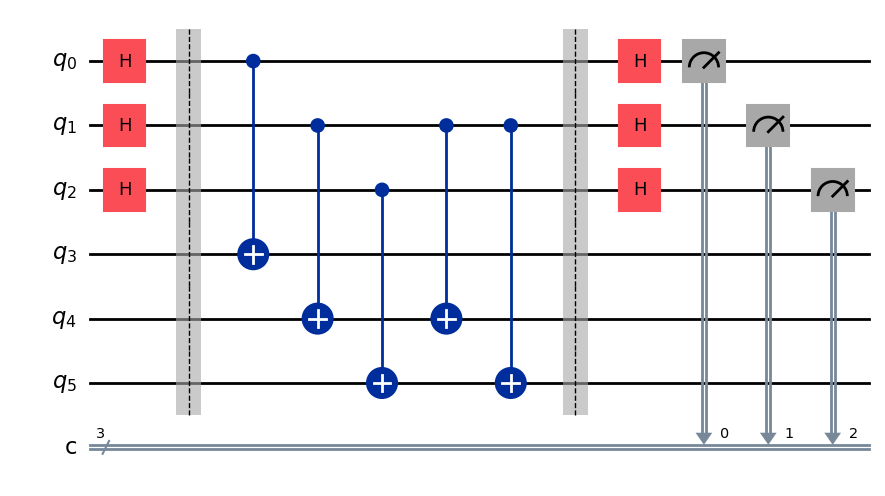

In [8]:
b = '110'
n = len(b)

# 2*n adet kübite ihtiyaç var.
simon_circuit = QuantumCircuit(n*2, n)

# Süperpozisyon'a geçirilir.
simon_circuit.h(range(n))    
simon_circuit.barrier()

simon_circuit.cx(0, 3)
simon_circuit.cx(1, 4)
simon_circuit.cx(2, 5)
simon_circuit.cx(1, 4)
simon_circuit.cx(1, 5)
simon_circuit.barrier()

# Süperpozisyondan hesaplama bazına geri dönülür
simon_circuit.h(range(n))

# Kübitler ölçülür
simon_circuit.measure(range(n), range(n))
simon_circuit.draw(output='mpl')

## Simon devresinin simülasyon sonuçları

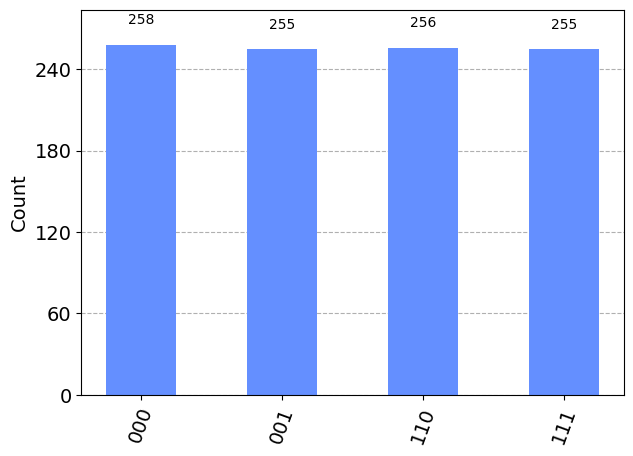

In [11]:
simulator = AerSimulator()
simon_circuit = transpile(simon_circuit, simulator)
counts = simulator.run(simon_circuit).result().get_counts(0)
plot_histogram(counts)

## Ölçüm sonuçların iç çarpımı (dot product) hesaplanmalıdır

In [12]:
def bdotz(b, z):
    accum = 0
    for i in range(len(b)):
        accum += int(b[i]) * int(z[i])
    return (accum % 2)

for z in counts:
    print( '{}.{} = {} (mod 2)'.format(b, z, bdotz(b,z)) )

110.001 = 0 (mod 2)
110.000 = 0 (mod 2)
110.111 = 0 (mod 2)
110.110 = 0 (mod 2)


Bu sonuçlar kullanılarak $b = 110$ aşağıdaki denklemleri çözerek elde edilebilir:
<br>Örnek olarak çözülen `001` için:
<br>
$ \require{cancel} 
    \begin{aligned}
        b \cdot001 & = 0 \\\\
        (b_2 \cdot 0) + (b_1 \cdot 0) + (b_0 \cdot 1) & = 0 \\\\
        \cancel{b_2 \cdot 0}) + (\cancel{b_1 \cdot 0}) + (b_0 \cdot 1) & = 0 \\\\ b_0 & = 0\\\\ 
    \end{aligned}$
<br>
$ \require{cancel} 
        \begin{aligned} b \cdot 111 &= 0 \\\ (b_2 \cdot 1) + (b_1 \cdot 1) + (\cancel{0 \cdot 1}) & = 0 \\\\
        (b_2 \cdot 1) + (b_1 \cdot 1) & = 0 \\\\
    \end{aligned}$
    
Bu sonuçlar kullanılarak:
<br>
$ b_2 = b_1 = 0, \quad b = 000 $ 
<br> veya <br>
$ b_2 = b_1 = 1, \quad b = 110 $ 
<br> bulunur.